<a href="https://colab.research.google.com/github/tejeshvarsk/tensorflow-tutorial/blob/main/basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Basics

## Constants

In [1]:
import tensorflow as tf

In [2]:
x=tf.constant([[1., 2., 3.],[4., 5., 6.]], dtype=tf.float32)

In [3]:
x.shape

TensorShape([2, 3])

In [4]:
x.dtype

tf.float32

In [5]:
x+x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [6]:
5*x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 5., 10., 15.],
       [20., 25., 30.]], dtype=float32)>

In [7]:
x @ tf.transpose(x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [8]:
tf.matmul(x, tf.transpose(x))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [9]:
tf.concat((x,x,x), axis=1)

<tf.Tensor: shape=(2, 9), dtype=float32, numpy=
array([[1., 2., 3., 1., 2., 3., 1., 2., 3.],
       [4., 5., 6., 4., 5., 6., 4., 5., 6.]], dtype=float32)>

In [10]:
tf.concat((x,x,x), axis=0)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [11]:
tf.nn.softmax(x)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.09003057, 0.24472848, 0.66524094],
       [0.09003057, 0.24472848, 0.66524094]], dtype=float32)>

In [12]:
tf.nn.softmax(x, axis=0)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.04742588, 0.04742588, 0.04742587],
       [0.95257413, 0.95257413, 0.95257413]], dtype=float32)>

In [13]:
tf.reduce_sum(x)

<tf.Tensor: shape=(), dtype=float32, numpy=21.0>

In [14]:
tf.convert_to_tensor([1,2,3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [15]:
tf.reduce_sum([1,2,3])

<tf.Tensor: shape=(), dtype=int32, numpy=6>

## Variables

In [16]:
var = tf.Variable([0., 0., 0.])

In [17]:
var.assign([1,2,3])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [18]:
var.assign_add([1,1,1])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

## Automatic Differentiation

In [19]:
x = tf.Variable(1.0)
def f(x):
    y = x**2 + 2*x -5
    return y

In [20]:
f(x)

<tf.Tensor: shape=(), dtype=float32, numpy=-2.0>

In [21]:
with tf.GradientTape() as tape:
    y = f(x)
g_x = tape.gradient(y,x)
g_x

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [22]:
@tf.function
def my_func(x):
    print('Tracing\n');
    return tf.reduce_sum(x)

In [23]:
x=tf.constant([1,2,3])
my_func(x)

Tracing



<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [24]:
x=tf.constant([8,9,10])
my_func(x)

<tf.Tensor: shape=(), dtype=int32, numpy=27>

In [25]:
x=tf.constant([1,2,3], dtype=tf.float32)
my_func(x)

Tracing



<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

## Modules, Layers and Models

In [26]:
class MyModule(tf.Module):
    def __init__(self, value):
        self.weight = value
    @tf.function
    def multiply(self, x):
        return x * self.weight

In [27]:
mod = MyModule(3)

In [28]:
print(mod.multiply(tf.constant([1,2,3])))

tf.Tensor([3 6 9], shape=(3,), dtype=int32)


In [29]:
save_path='./saved'
tf.saved_model.save(mod, save_path)

INFO:tensorflow:Assets written to: ./saved/assets


In [30]:
reloaded = tf.saved_model.load(save_path)
reloaded.multiply(tf.constant([1,2,3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

In [31]:
reloaded.multiply([5,3,2])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([15,  9,  6], dtype=int32)>

## Training loops

In [32]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = (9,6)


In [33]:
x= tf.linspace(-2,2,201)
x=tf.cast(x, tf.float32)
def f(x):
    y = x**2 + 2*x -5
    return y

y = f(x) + tf.random.normal(shape=(201,))

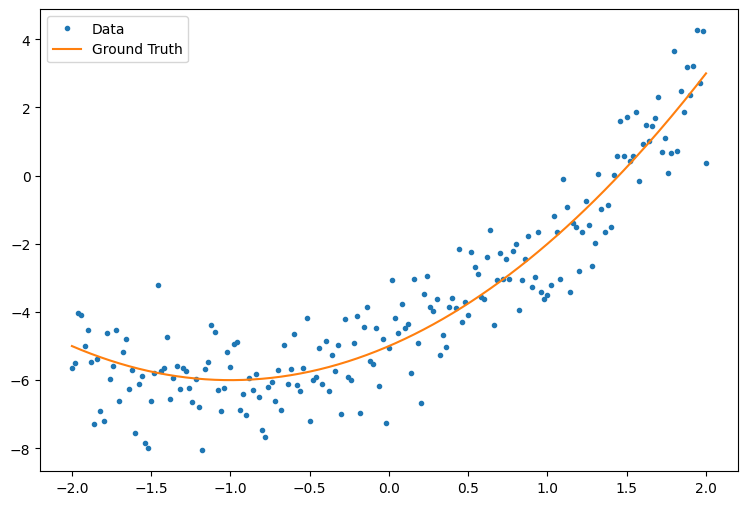

In [34]:
plt.plot(x,y,'.',label='Data')
plt.plot(x,f(x),label='Ground Truth')
plt.legend()

In [35]:
class Model(tf.Module):
    def __init__(self):
        weights = tf.random.uniform(shape=(3,), minval=0, maxval=5, seed=22)
        self.w_q = tf.Variable(weights[0])
        self.w_l = tf.Variable(weights[1])
        self.b = tf.Variable(weights[2])

    @tf.function
    def __call__(self, x):
        return self.w_q * (x**2) + self.w_l * x + self.b

quad_model = Model()

In [36]:
quad_model(x)
quad_model.variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.6892653>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.3870163>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.4291573>)

In [37]:
def plot_preds(x,y,f,model, title):
    plt.figure()
    plt.plot(x,y,'.',label='Data')
    plt.plot(x,f(x),label='Ground Truth')
    plt.plot(x, model(x), label='Predicitions')
    plt.title(title)
    plt.legend()

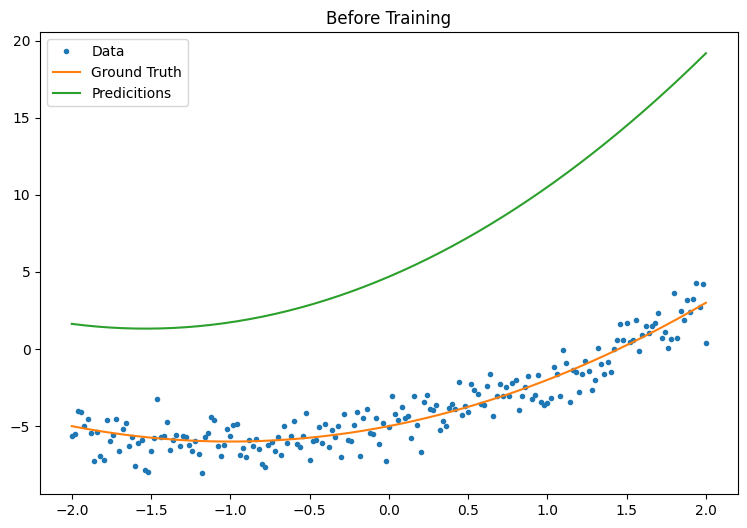

In [38]:
plot_preds(x,y,f,quad_model,'Before Training')

In [39]:
def mse_loss(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred-y))

In [40]:
batch_size=32
dataset = tf.data.Dataset.from_tensor_slices((x,y))
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)

Loss at epoch 0 is 57.66
Loss at epoch 10 is 9.45
Loss at epoch 20 is 3.94
Loss at epoch 30 is 2.00
Loss at epoch 40 is 1.31
Loss at epoch 50 is 1.07
Loss at epoch 60 is 0.99
Loss at epoch 70 is 0.96
Loss at epoch 80 is 0.95
Loss at epoch 90 is 0.94


Text(0.5, 1.0, 'Epochs Vs Loss')

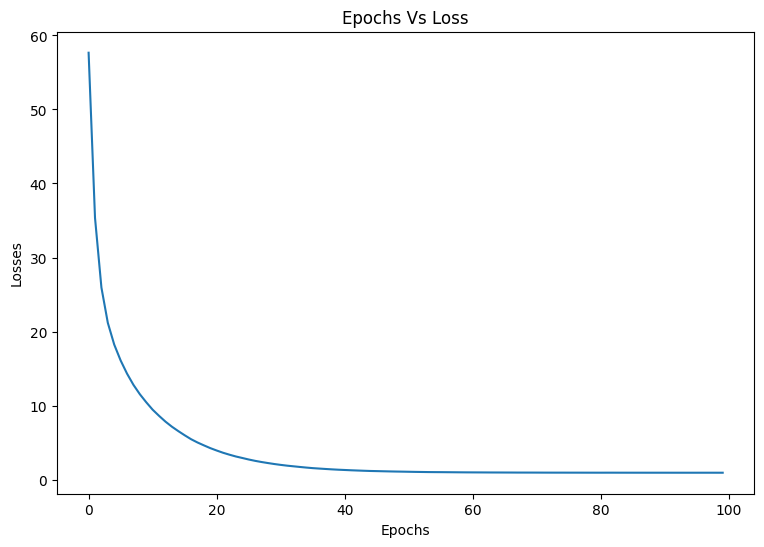

In [41]:
epochs=100
losses=[]
learning_rate=0.01
for epoch in range(epochs):
    for x_batch,y_batch in dataset:
        with tf.GradientTape() as tape:
            batch_loss = mse_loss(quad_model(x_batch), y_batch)
        grads=tape.gradient(batch_loss, quad_model.variables)
        for g,v in zip(grads, quad_model.variables):
            v.assign_sub(learning_rate*g)
    loss = mse_loss(quad_model(x), y)
    losses.append(loss)
    if(epoch%10==0):
        print(f'Loss at epoch {epoch} is {loss:.2f}')

plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Epochs Vs Loss')

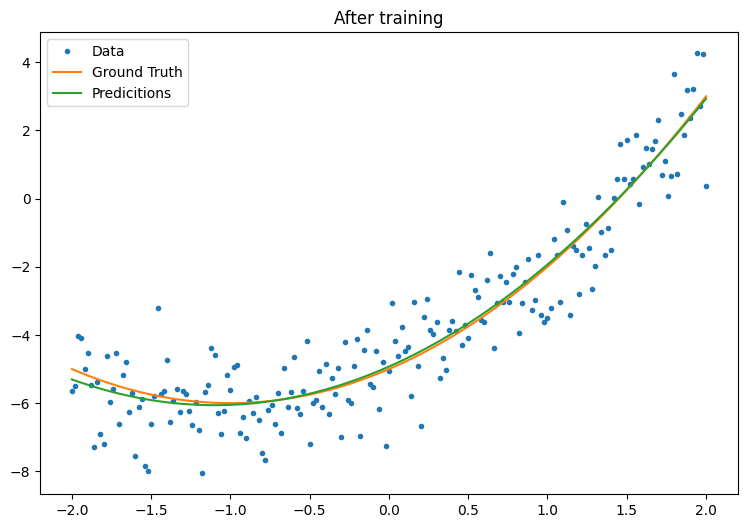

In [42]:
plot_preds(x, y,f, quad_model, 'After training')

In [53]:
new_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x : tf.stack( (x*x, x), axis=1)),
    tf.keras.layers.Dense(units=1, kernel_initializer=tf.random.normal)
])

In [54]:
new_model.compile(loss=tf.keras.losses.MSE,
                  optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))

In [55]:
history=new_model.fit(x,y,batch_size=32, epochs=100, verbose=0)

In [56]:
new_model.save('./my_new_model')

INFO:tensorflow:Assets written to: ./my_new_model/assets


INFO:tensorflow:Assets written to: ./my_new_model/assets
/opt/homebrew/Caskroom/miniforge/base/envs/tf_env/lib/python3.10/site-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'function'>, which may lead to improper serialization.
  warnings.warn(


Text(0.5, 1.0, 'Keras Training Progress')

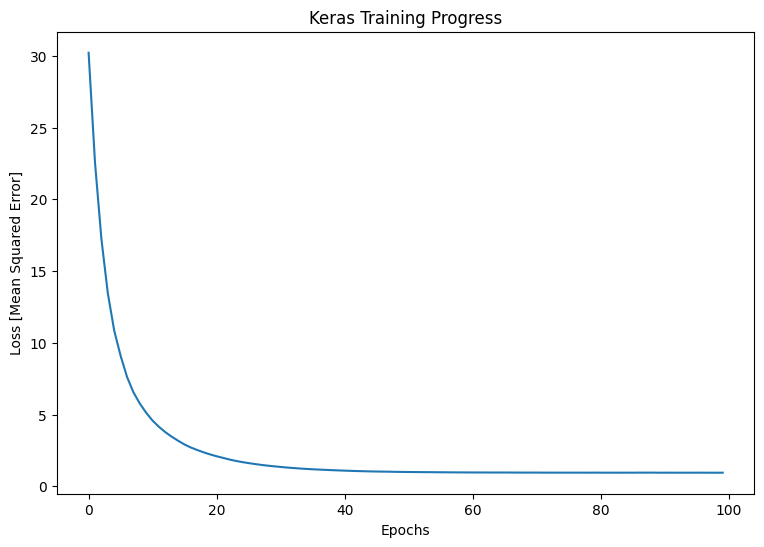

In [61]:
plt.plot(range(epochs), history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras Training Progress')

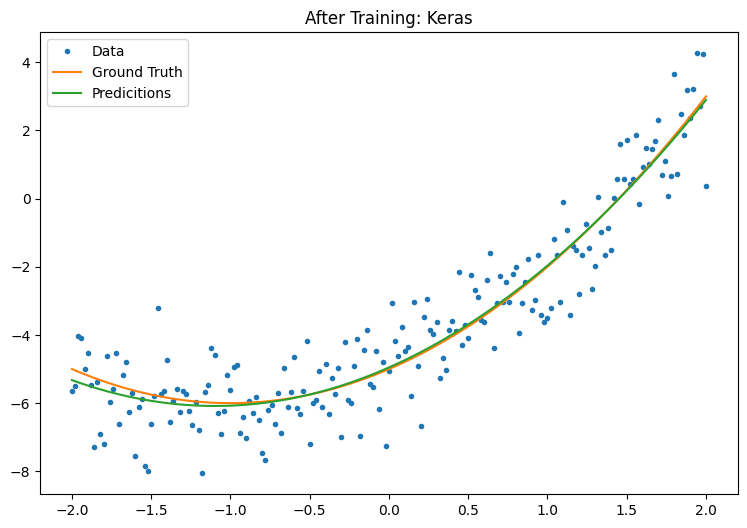

In [62]:
plot_preds(x,y,f, new_model, 'After Training: Keras')